<a href="https://colab.research.google.com/github/anapaulazampier/mvp-machinelearning/blob/main/mvp_machinelearning_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP - Machine Learning & Analytics

## Pós Graduação Data Science & Analytics - PUC Rio

**Aluna:** Ana Paula Zampier Abreu Alvarenga

**Sprint:** Machine Learning & Analytics (40530010056_20240_02)

**Github:** https://github.com/anapaulazampier/

**Discord:** @anapaulazampier



##Introdução

#### Proposta
Para o presente trabalho, foi selecionado um dataset dos exercícios realizados por membros de uma academia. Nele possuímos informações relacionadas a características físicas dos atletas, como gênero, idade, peso, etc e também a características do exercício realizado como o tempo de duração, tipo de exercício e total de calorias queimadas na sessão.

Como proposta, trabalho aqui realizado pretende treinar um modelo de machine learning capaz de prever o total de calorias queimadas em uma sessão de exercícios e avaliar seus resultados.

#### Hipóteses e premissas
Ao selecionar um dataset relacionado a atividades que fazem parte do cotidiano da autora, algumas hipóteses foram formuladas baseadas em sua própria experiência como praticante de atividades físicas em academias. Foram elas:
- Certos tipo de exercício apresentam um grau de gasto calórico mais elevado que os demais, por exemplo uma sessão de cardio é capaz de queimar mais calorias que uma sessão de yoga.
- Quanto maior a duração da sessão, maior o gasto calórico.
- Quanto mais alta frequência cardíaca média da sessão, maior o gasto calórico.
- Idade e sexo não devem desempenhar um papel tão relevante no gasto calórico, mas podem influenciar o tipo de exercício praticado.



### Dicionário de Dados - Gym Members Exercise Dataset

| **Campo**                     | **Descrição**                                                                 |
|-------------------------------|-------------------------------------------------------------------------------|
| **Age**                       | Idade do membro da academia.                                                  |
| **Gender**                    | Gênero do membro da academia (Masculino ou Feminino).                        |
| **Weight (kg)**               | Peso do membro em quilogramas.                                               |
| **Height (m)**                | Altura do membro em metros.                                                  |
| **Max_BPM**                   | Frequência cardíaca máxima (batimentos por minuto) durante as sessões de treino. |
| **Avg_BPM**                   | Frequência cardíaca média durante as sessões de treino.                      |
| **Resting_BPM**               | Frequência cardíaca em repouso antes do treino.                              |
| **Session_Duration (hours)**  | Duração de cada sessão de treino em horas.                                   |
| **Calories_Burned**           | Total de calorias queimadas durante cada sessão.                             |
| **Workout_Type**              | Tipo de treino realizado (ex.: Cardio, Força, Yoga, HIIT).                  |
| **Fat_Percentage**            | Percentual de gordura corporal do membro.                                    |
| **Water_Intake (liters)**     | Ingestão diária de água durante os treinos em litros.                       |
| **Workout_Frequency (days/week)** | Número de sessões de treino por semana.                                   |
| **Experience_Level**          | Nível de experiência, de iniciante (1) a especialista (3).                  |
| **BMI**                       | Índice de Massa Corporal, calculado a partir da altura e peso.              |


- Analyzing gym members' workout habits and performance metrics
- Building predictive models for fitness progression and calorie expenditure
- Conducting research on heart rate variability, BMI, and exercise intensity
- Developing insights into the relationship between experience level and workout patterns

##Preparação e análise dos dados


Para o processo de preparação dos dados, serão avaliadas as estatísticas descritivas do dataset, presença de valores faltantes e necessidade de encoding. Por se tratar de um conjunto de dados da plataforma Kaggle e ser bastante estruturado e limpo, não serão necessários processos mais elaborados de preparação.

Para a etapa seguinte, serão plotados diversos gráficos direcionados pelas hipóteses propostas na sessão anterior.

In [49]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.ensemble import RandomForestRegressor # algoritmo Random Forest

In [50]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


#### Análise das estatísticas descritivas

In [51]:
#Leitura do dataset baixado em um dataframe
file_path = f"{path}/gym_members_exercise_tracking.csv"
gym_members_exercise_tracking = pd.read_csv(file_path)
gym_members_exercise_tracking.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [52]:
#Análise das estatísticas descritivas
gym_members_exercise_tracking.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [53]:
#Validação de valores nulos no dataset
gym_members_exercise_tracking.isna().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0




Como afirmado anteriormente, o dataset é limpo e estrurado. Não foi observada a presença de outliers problemáticos que necessitem remoção, nem valores nulos que indiquem a necessidade de tratamentos adicionais como remoção ou interpolação.

Dessa forma, podemos serguir para exploração dos dados através da plotagem de algumas variáveis.

#### Visualização de dados

In [54]:
count_df = gym_members_exercise_tracking.groupby(['Experience_Level', 'Gender']).size().reset_index(name='Count')
fig = px.histogram(count_df, x="Experience_Level", y="Count", title="Distribuição de Experiência por Gênero",
             color='Gender', barmode='group', text_auto=True,
             height=400, width = 950)
fig.show()

In [55]:
count_df = gym_members_exercise_tracking.groupby(['Workout_Frequency (days/week)', 'Gender']).size().reset_index(name='Count')
fig = px.histogram(count_df, x="Workout_Frequency (days/week)", y="Count", title="Distribuição de Frequência de Treino por Gênero",
             color='Gender', barmode='group', text_auto=True,
             height=400, width = 950)
fig.show()

In [56]:
count_df = gym_members_exercise_tracking.groupby(['Workout_Type', 'Gender']).size().reset_index(name='Count')
fig = px.histogram(count_df, x="Workout_Type", y="Count", title="Distribuição de Treino por Gênero",
             color='Gender', barmode='group', text_auto=True,
             height=400, width = 950)
fig.show()

A partir dos gráficos Distribuição de Experiência por Gênero, Distribuição de Frequência de Treino por Gênero e Distribuição de Treino por Gênero, podemos constatar que a variavél de gênero não possui grande influência no nível de experência, assiduidade aos treinos e preferência por exercícios de determinado tipo.

Essa percepção corrobora para descartar algumas hipóteses formuladas envolvendo o gênero dos participantes do estudo.

Em uma etapa futura desse trabalho, será possível verificar também essa percepção através da correlação entre as variáveis gênero e tipo de atividade.

In [57]:
fig = px.box(gym_members_exercise_tracking,
             x="Workout_Type", y="Calories_Burned", points = 'all',
             title="Boxplot de Gastos Calóricos por Tipo de Exercício",
             height = 600, width = 1100)
fig.show()

Esse boxplot é muito relevante, pois é um indicativo que uma das minhas hipóteses estavam erradas. Não é possível observar com clareza uma relaçao do tipo de exercício influenciando em uma maior ou menor queima de calorias. Algo que veremos mais a frente na matriz de correlação.

In [58]:
fig = px.box(gym_members_exercise_tracking,
             x="Experience_Level", y="Calories_Burned", points = 'all',
             title="Boxplot de Gastos Calóricos por Nível de Experiência",
             height = 600, width = 1100)
fig.show()

Podemos observar que pessoas mais experientes têm em média um melhor desempenho em seus treinos, atingindo patamares mais elevados de gasto calórico que pessoas menos experientes.

In [59]:
fig = px.scatter(gym_members_exercise_tracking,
                 x="Calories_Burned", y="Session_Duration (hours)", color="Workout_Type",
                 title="Calorias queimadas vs duração do exercício",
                 height = 500, width=950)
fig.show()

Acima, é facil observar que quanto maior a duração das sessões de treino, maior o gasto calórico.

In [60]:
fig = px.scatter(gym_members_exercise_tracking,
                 x="Calories_Burned", y="Avg_BPM",color="Workout_Type",
                 title="Calorias queimadas vs BPM",
                 height = 500, width=950)
fig.show()

Porfim, não somos capazes de observar visualmente uma relação clara entre a média de batimentos cardíacos de um exercício e seu gasto calórico.
Assim, seguimos para a etapa de pré-processamento dos dados.

##Pré-processamento

O pré-processamento dos dados selecionados será divido em 5 etapas principais:

1. Encoding das colunas categóricas Gender e Workout Type
2. Scaling/Padronização das variáveis
3. Análise da matriz de correlação
4. Redução de dimensionalidade
5. Separação dos dados em conjunto de treino e teste

###Encoding de variáveis categóricas

Como mencionado anteriormente, as colunas `Gender` e `Workout_Type` possuem dados categóricos e precisam passar pelo processo de encoding, ou seja, seu valores serão transformados em categorias numéricas para que seja possível utilizar tais informações em um modelo matemático.

In [61]:
excercise_encoded = gym_members_exercise_tracking.copy()
excercise_encoded['Gender'] = excercise_encoded['Gender'].map({'Male': 0, 'Female': 1})
excercise_encoded['Workout_Type'] = excercise_encoded['Workout_Type'].map({'Cardio': 0, 'Strength': 1, 'Yoga': 2, 'HIIT': 3})
excercise_encoded.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,0,88.3,1.71,180,157,60,1.69,1313.0,2,12.6,3.5,4,3,30.20
1,46,1,74.9,1.53,179,151,66,1.30,883.0,3,33.9,2.1,4,2,32.00
2,32,1,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,0,53.2,1.70,190,164,56,0.59,532.0,1,28.8,2.1,3,1,18.41
4,38,0,46.1,1.79,188,158,68,0.64,556.0,1,29.2,2.8,3,1,14.39


###Padronização das variáveis e criação da matriz de correlação

Após padronizar os dados, podemos calcular a correlação entre as variáveis sem que a diferença de grandeza de valores distorça os resultados.

Para analisar a matriz de correlação, devemos ter em mente que a variável alvo do modelo é o total de calorias queimadas durante uma sessão de exercícios, portanto devemos analisar a forma como as outras variáveis se correlacionam com `Calories_Burned`.

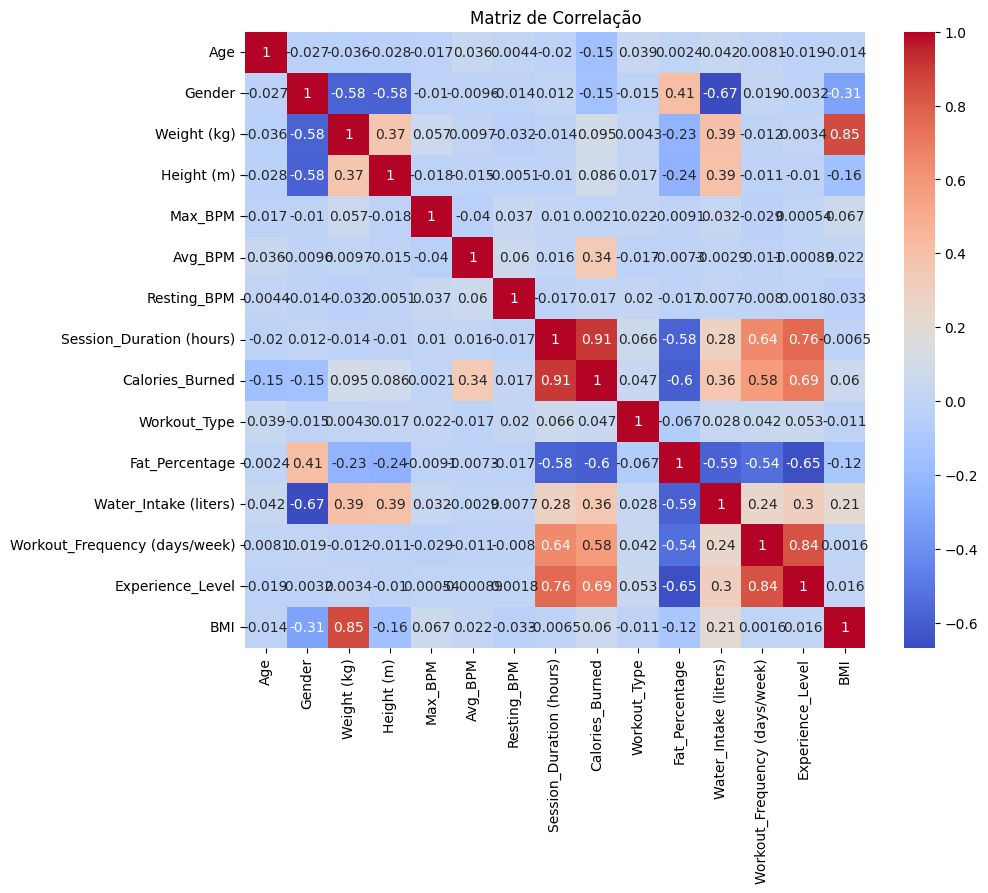

In [62]:
# Padronizando as Variáveis
scaler = StandardScaler()
excercise_encoded_scaled = pd.DataFrame(scaler.fit_transform(excercise_encoded), columns = excercise_encoded.columns)

# Calculando a matriz de correlação
correlation_matrix = excercise_encoded_scaled.corr()

# Plot
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Da matriz plotada acima, podemos observar:


*   As variáveis `Weight (kg)` e `Height (m)` apresentam uma correlação positiva muito fraca com a variável alvo. O que sugere que o peso e altura da pessoa podem não influenciar fortemente seu gasto calórico.
*   As variáveis `Max_BPM` e `Resting_BPM` também aprensetam uma correção fraca, ao passo que `Avg_BPM` tem uma correlação positiva alta com a variável alvo.
* A variável `BMI` também apresentou uma correlação muito baixa com a variável alvo, o que demostra coerência, pois o BMI é calculado através do peso e altura, e como visto anteriormente essas também são variáveis de baixa correlação com a variável alvo.

Dessa forma, podemos inferir um ponto de corte nos valores absolutos de correlação para reduzirmos a dimensionalidade do dataset.


###Redução de dimensionalidade

No tópico anterior, observamos variáveis que possuem uma relação de correlação muito baixa com a variável alvo e que, portanto, podem ser removidas do dataset. Para isso foi determinado um ponto de corte no valor absoluto da correlação:

$Ponto De Corte = 0.1$


In [63]:
ponto_de_corte = 0.1

selected_columns = correlation_matrix[abs(correlation_matrix['Calories_Burned']) >= ponto_de_corte].index.tolist()

excercise_encoded_scaled_reduced = excercise_encoded_scaled[selected_columns]
excercise_encoded_scaled_reduced.head(5)


,Age,Gender,Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
0,1.422343,-0.950847,0.922970,1.264598,1.495690,-1.978321,1.455967,0.743295,1.609784
1,0.600965,1.051694,0.504494,0.127098,-0.082284,1.426301,-0.877898,0.743295,0.257176
2,-0.548964,1.051694,-1.518142,-0.427068,-0.838243,1.346380,-0.544488,0.743295,0.257176
3,-1.123928,-0.950847,1.411193,-1.943735,-1.370351,0.611110,-0.877898,-0.352502,-1.095432
4,-0.056137,-0.950847,0.992716,-1.797902,-1.282278,0.675047,0.289035,-0.352502,-1.095432


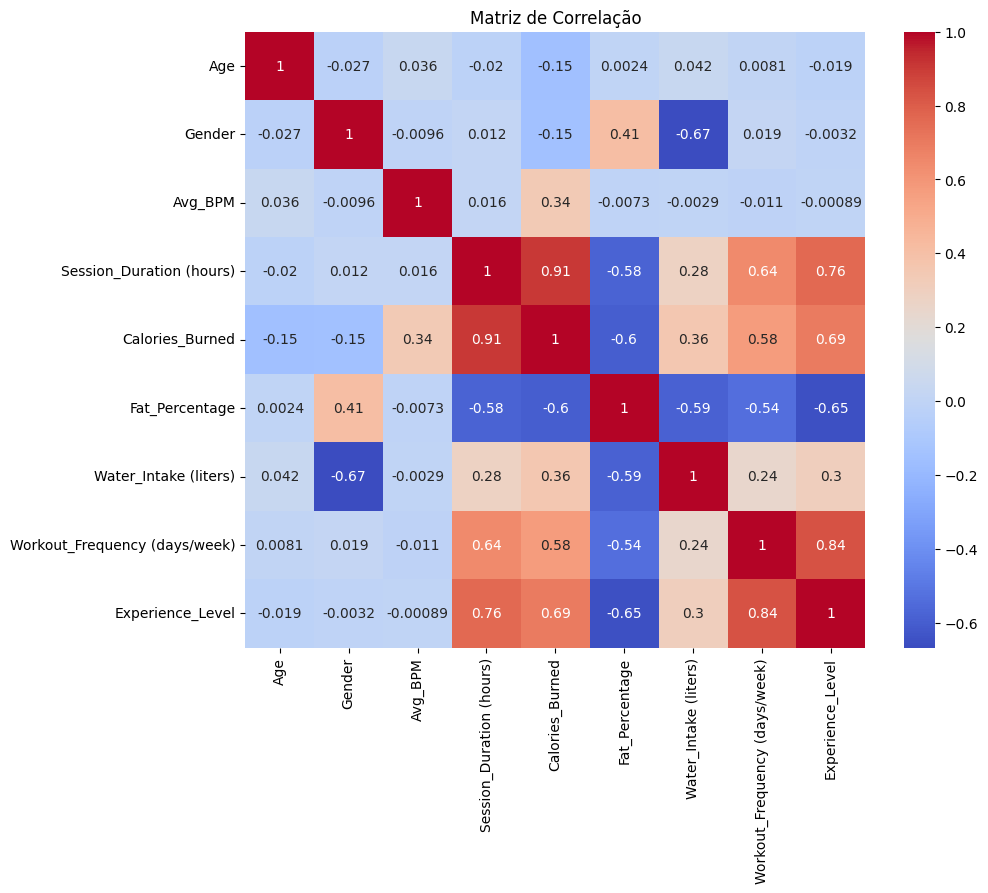

In [64]:
# Nova matriz de correlação após redução
correlation_matrix = excercise_encoded_scaled_reduced.corr()

# Plot
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Matriz de Correlação')
plt.show()

###Separação de dados de treino e teste

Em sequência, retornamos ao dataset original para remover as colunas mapeadas na etapa anterior.

A partir do dataset original reduzido, separamos os conjuntos de treino e teste. Após a separação, aplicamos a padronização dos valores.

In [65]:
#Primeiro vamos reduzir a dimensionalidade do df original, que passou somente pelo encoding das colunas de genero e tipo de exercício

excercise_encoded_reduced = excercise_encoded[selected_columns]
excercise_encoded_reduced.head(5)

#Agora vamos separar em treino e teste
X = excercise_encoded_reduced.drop(columns=['Calories_Burned'])  # Features
y = excercise_encoded_reduced['Calories_Burned']                  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [66]:
#Agora vamos passar o scaler nos conjuntos separados de treino e teste

ss_x = StandardScaler()
ss_y = StandardScaler()

X_train_scaled = ss_x.fit_transform(X_train)
X_test_scaled = ss_x.transform(X_test)

y_train_scaled = ss_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = ss_y.transform(y_test.values.reshape(-1, 1))

## Modelagem e treinamento

Com os conjuntos de treino e teste separados, inica-se a sessão de modelagem e treinamento, a qual possui as seguintes etapas:

1. Seleçao dos modelos de regressão a serem aplicados
2. Avaliação do erro quadrático médio e raiz do erro quadrático médio para cada um dos modelos selecionados
3. Boxplot comparativo das métricas de MSE por modelo
4. Seleção do modelo para treinamento

###Modelagem e avaliação dos modelos

Foram selecionados sete modelos de regressão para avaliação.
Para avaliação, serão consideradas as métricas de erro quadrático médio (MSE) e raiz do erro quadrático médio (RMSE).

O erro quadrático médio calcula a diferença entre os valores preditos e o valores reais, elevando o resultado ao quadrado e dividindo pela quantidade de elementos preditos. Dessa forma, buscamos pelo modelo que aprensente o menor erro quadrático.

Para melhorar a interpretabilidade dos resultados, visto que o erro quadrático médio é dado em $u^{2}$, a raiz do erro médio quadrático fornece valores na unidade pro problema, no caso, nos valores padronizados de calorias queimadas em uma sessão. Analogamente, buscamos pelo modelo com menores métricas de erro.

In [67]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('RandomForrest', RandomForestRegressor()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train_scaled, y_train_scaled, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)


# Boxplot de comparação dos modelos
df_results = pd.DataFrame(results).T
df_results.columns = names
results_long = df_results.melt(var_name='Model', value_name='MSE')

fig = px.box(results_long, x='Model', y='MSE', title='Comparação do MSE dos Modelos')
fig.update_layout(xaxis_title='Modelos', yaxis_title='MSE')
fig.show()

LR: MSE 0.02 (0.00) - RMSE 0.14
Ridge: MSE 0.02 (0.00) - RMSE 0.14
Lasso: MSE 1.00 (0.18) - RMSE 1.00
KNN: MSE 0.09 (0.02) - RMSE 0.30
CART: MSE 0.06 (0.01) - RMSE 0.24
SVM: MSE 0.01 (0.01) - RMSE 0.12
RandomForrest: MSE 0.02 (0.00) - RMSE 0.14


Comentários sobre os erros de cada um dos modelos:
- **Lasso:** Foi o modelo com pior desempenho. Apresentou valores elevados de erro em comparação aos demais modelos e também um alto desvio padrão do erro médio. Indicado que o modelo de penalizações de Lasso, que tende a zerar o coeficiente de variáveis menos relevantes, não é o mais adequado para o dataset.
- **Ridge:** Apresentou um ótimo desempenho, com baixas métricas de erro e baixo desvio padrão. Ao passo que Lasso reduz a zero o coeficiente de variáveis menos relevantes, Ridge apenas reduz os coeficientes, levando a um melhor desempenho do modelo.
- **Regressão Linear:** Também apresentou excelentes resultados similares ao modelo Ridge.
- **SVM:** Apresentou as menores métricas de erro, entretando possui desvio padrão maior que os modelos de Ridge e Regressão Linear.
- **Random Forrest:** Também apresentou métricas similares a Ridge e Regressão Linear, possuindo um RMSE ligeramente mais elevado.
- **KNN e CART:** Não apresentaram um bom desempenho, tiveram métricas medianas em relação aos demais modelos.

###Treinamento

Como diversos modelos apresentaram resultados muito próximos, selecionamos para treinamento Regressão Linear, Ridge, SVM e Random Forrest. Assim, selecionaremos o modelo de melhor **Score** (precisão).

In [68]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Fazendo as predições com o conjunto de teste
predictions_LR = model.predict(X_test_scaled)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test_scaled, predictions_LR)

#Model score:
score = model.score(X_test_scaled,y_test_scaled)
print("--- Linear Regression ---")
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))
print("Score: %0.2f" % score)

--- Linear Regression ---
MSE 0.02
RMSE 0.15
Score: 0.98


In [69]:
# Criando um modelo com todo o conjunto de treino
model = Ridge()
model.fit(X_train_scaled, y_train_scaled)

# Fazendo as predições com o conjunto de teste
predictions_Ridge = model.predict(X_test_scaled)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test_scaled, predictions_Ridge)

#Model score:
score = model.score(X_test_scaled,y_test_scaled)
print("--- Ridge ---")
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))
print("Score: %0.2f" % score)

--- Ridge ---
MSE 0.02
RMSE 0.15
Score: 0.98


In [70]:
# Criando um modelo com todo o conjunto de treino
model = SVR()
model.fit(X_train_scaled, y_train_scaled)

# Fazendo as predições com o conjunto de teste
predictions_SVR = model.predict(X_test_scaled)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test_scaled, predictions_SVR)

#Model score:
score = model.score(X_test_scaled,y_test_scaled)
print("--- SVR ---")
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))
print("Score: %0.2f" % score)

--- SVR ---
MSE 0.01
RMSE 0.11
Score: 0.99


In [71]:
# Criando um modelo com todo o conjunto de treino
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train_scaled)

# Fazendo as predições com o conjunto de teste
predictions_RF = model.predict(X_test_scaled)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test_scaled, predictions_RF)

#Model score:
score = model.score(X_test_scaled,y_test_scaled)
print("--- Random Forrest ---")
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))
print("Score: %0.2f" % score)

--- Random Forrest ---
MSE 0.02
RMSE 0.14
Score: 0.98


De fato, o modelo SVM apresentou boas métricas de erro e uma maior precisão em relação aos demais e, portanto, será o selecionado para avaliação de resultados.

## Avaliação e Resultados

O modelo SVM, embora muito usado para problemas de classificação, também pode ser utilizado em problemas de regressão. Conceitualmente, o modelo busca encontrar o hiperplano (função de regressão) que separa classes de dados melhor se ajustando as dados de treinamento, para minimizar os erros. Assim como na imagem abaixo:

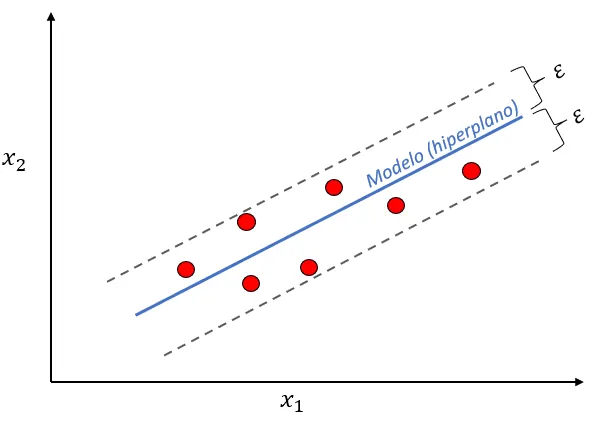


Para avaliarmos os resultados do modelo proposto, devemos tomar o conjunto de valores preditos e de valores reais e aplicar a transformada inversa da padronização realizada na etapa de separação do conjunto de dados em treino e teste. Assim, podemos analisar visualmente os resultados obtidos ponto a ponto.

In [72]:
predictions_original = ss_y.inverse_transform(predictions_SVR.reshape(-1, 1)).flatten()
y_test_original = ss_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
x_test_original = ss_x.inverse_transform(X_test_scaled)


results_df = pd.DataFrame({
    'Valores Reais': y_test_original.flatten(),
    'Predições': predictions_original.flatten() })

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(results_df['Valores Reais']))), y=results_df['Valores Reais'],
                         mode='lines+markers', name='Valores Reais'))
fig.add_trace(go.Scatter(x=list(range(len(results_df['Predições']))), y=results_df['Predições'],
                         mode='lines+markers', name='Predições'))

fig.update_layout(title='Comparação de Valores Reais e de Predição',
                  xaxis_title='Índice',
                  yaxis_title='Valor')
fig.show()


Observamos resultados de predição satisfatórios, pois se aproximam muito dos valores originais, assim como proposto pelo conceito do modelo.

Também é possível aplicar o modelo treinado anteriormente em todo conjunto de dados e avaliar os resultados.

In [73]:
#Teste com o conjunto completo
#Separação em variável alvo e features

X_todo = excercise_encoded_scaled_reduced.drop(columns=['Calories_Burned'])  # Features
y_todo = excercise_encoded_scaled_reduced['Calories_Burned']                  # Target variable

# Aqui temos o mesmo modelo treinado anteriormente, com o conjunto de treino representando 20% do dataset original
model = SVR()
model.fit(X_train_scaled, y_train_scaled)

# Fazendo as predições para o dataset inteiro
predictions_SVR = model.predict(X_todo)

# Estimando o MSE e o RMSE
mse = mean_squared_error(y_todo, predictions_SVR)

#Model score:
score = model.score(X_todo,y_todo)
print("--- SVR ---")
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))
print("Score: %0.2f" % score)

--- SVR ---
MSE 0.01
RMSE 0.10
Score: 0.99


In [74]:
predictions_original = ss_y.inverse_transform(predictions_SVR.reshape(-1, 1)).flatten()
y_original = ss_y.inverse_transform(np.array(y_todo).reshape(-1, 1))
x_original = ss_x.inverse_transform(X_todo)


results_df = pd.DataFrame({
    'Valores Reais': y_original.flatten(),
    'Predições': predictions_original.flatten() })

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(results_df['Valores Reais']))), y=results_df['Valores Reais'],
                         mode='lines+markers', name='Valores Reais'))
fig.add_trace(go.Scatter(x=list(range(len(results_df['Predições']))), y=results_df['Predições'],
                         mode='lines+markers', name='Predições'))

fig.update_layout(title='Comparação de Valores Reais e de Predição Para Todo Dataset',
                  xaxis_title='Índice',
                  yaxis_title='Valor')
fig.show()

Com a biblioteca Plotly, é possível ter maior interatividade com as visualizações de dados. Assim, podemos dar zoom em determinados intervalos de dados ou olhar a visualização como um todo.

Por fim, podemos novamente concluir que o modelo SVM se ajustou muito bem aos dados de treinamento e trouxe previões muito próximas dos valores reais, mostrando-se um modelo adequado para os objetivos propostos no presente trabalho.